# Practical Machine Learning for Physicists
## Week 4 Exercise - Part 1


### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracy you can achieve using a single convolutional layer?

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutional laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracy you can achieve using as many convolutional layers as you like?

#### Practicalities
You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these tasks. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


#### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

#### Import MNIST Dataset

In [2]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images1, train_labels), (test_images1, test_labels) = mnist.load_data()

#### Data processing
Normalise the data by dividing by 255.0 and make sure the shape of the image is correct.

In [3]:
# Scale the data
train_images = train_images1 / 255.0
test_images = test_images1 / 255.0

# Reshape the data
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

#### Task 1
In the cell below, the neural network model has been designed with a single convolutional layer.

##### Model
Explanation of each layer:

1. Convolutional Layer (relu activation): detects some low-level features of the image 

2. MaxPooling2D Layer: reduces the size of the data, whilst keeping key features. It also helps to reduce overfitting by ensuring fewer parameters.

3. Dropout Layer: randomly 'turns off' neurons in each step of training. Dropout rate of 0.25 means that 25% of input units are turned off.

4. Flatten Layer: converts the output from the previous layer into a 1D vector

5. Dense Layer (softmax activation): calculates the probabilities of the image belonging to a certain category. The softmax activation makes sure the probabilities = 1.

This model has only 1 convolutional layer.

In [4]:
# Create the model
model = Sequential()

# Convolutional Layer
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# MaxPooling layer to reduce the size of data
model.add(MaxPooling2D((2, 2)))

# Dropout layer
model.add(Dropout(0.25)),

# Flatten layer to convert to 1D vector
model.add(Flatten()),

# Dense layer with softmax activation to compute probabilities
model.add(Dense(10, activation='softmax'))

# Use adam optimiser and categorical crossentropy loss function (since its a classification task)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                27050     
Total params: 27,210
Trainable params: 27,210
Non-trainable params: 0
_________________________________________________________________


Next, the model is trained. The training is timed to provide a gauge of efficiency, however this runtime will vary depending on the PC the code is run on.

In [5]:
t0 = time.time()
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, verbose=1, validation_data=(test_images, test_labels))
t1 = time.time()

print(f"Time: {t1-t0 :.2f}")

Epoch 1/10
469/469 [==============================] - 7s 15ms/step - loss: 0.7807 - accuracy: 0.7956 - val_loss: 0.2116 - val_accuracy: 0.9401
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2148 - accuracy: 0.9392 - val_loss: 0.1392 - val_accuracy: 0.9597
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1561 - accuracy: 0.9546 - val_loss: 0.1150 - val_accuracy: 0.9675
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1322 - accuracy: 0.9614 - val_loss: 0.0945 - val_accuracy: 0.9720
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1137 - accuracy: 0.9669 - val_loss: 0.0827 - val_accuracy: 0.9750
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1024 - accuracy: 0.9698 - val_loss: 0.0755 - val_accuracy: 0.9753
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0918 - accuracy: 0.9723 - val_loss: 0.0679 - val_accuracy: 0.9782

After varying the number of epochs on the model above and plotting cost against epochs, it was found that approx. 10 epochs led to the least overfitting. Therefore 10 epochs was chosen to train this model.

#### Test Accuracy
Below we check the test accuracy of the model

In [6]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.9814000129699707


The test accuracy is approximately 0.98 to 0.99, which is very high (above 95%). 

#### Training and Validation Accuracy
Below we plot the accuracy of the model on the training set and on the validation set. 

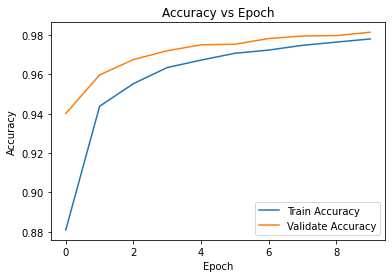

In [7]:
# Plot
plt.figure()
plt.title('Accuracy vs Epoch')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validate Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

When varying the number of epochs, it was found that beyond 10 epochs, the validation accuracy would no longer increase with the training accuracy, suggesting overfitting of the model. Therefore 10 epochs was used.

#### Training and Validation Loss
Below, the loss was plotted against epochs, for both the training and validation loss.

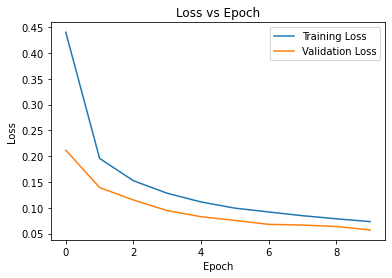

In [8]:
# Plot the training and validation loss
plt.figure()
plt.title('Loss vs Epoch')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Again, when varying epochs, it was found that the loss does not really go any lower beyond 10 epochs, so 10 epochs was maintained.

### Task 2

In this task I will design, implement and test a neural network utitlising multiple convolutional layers and other non-convolutional layers to classify the MNIST handwritten digits. 

The aim is to find the maximum test accuracy using this method.

#### Reload the dataset

In [9]:
# Load the MNIST data
(train_images2, train_labels), (test_images2, test_labels) = keras.datasets.mnist.load_data()

# Scale the data
train_images = train_images2 / 255.0
test_images = test_images2 / 255.0

# Reshape the data
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

#### Create the new model

This new model has multiple convolutional layers (3 of them), and each of these has a larger number of neurons than before.

In [10]:
# Create the model
model2 = Sequential()

# Convolutional Layer
model2.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# MaxPooling
model2.add(MaxPooling2D((2, 2)))

# Convolutional Layer
model2.add(Conv2D(16, (3, 3), activation='relu'))

# MaxPooling
model2.add(MaxPooling2D((2, 2)))

# Convolutional Layer
model2.add(Conv2D(16, (3, 3), activation='relu'))

# Flatten Layer
model2.add(Flatten())

# Dense Layers
model2.add(Dense(16, activation='relu'))

# Softmax output layer (10 neurons as there are 10 digits)
model2.add(Dense(10, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 16)          2320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)               

As shown in the above summary, the new network with multiple convolutional layers (and more neurons per layer) has significantly more total parameters. This means that it will also take longer to train.

#### Training the model

In [11]:
t0 = time.time()
history = model2.fit(train_images, train_labels, batch_size=100, epochs=10, verbose=1, validation_data=(test_images, test_labels))
t1 = time.time()

print(f"Time: {t1-t0 :.2f}")

Epoch 1/10
600/600 [==============================] - 9s 15ms/step - loss: 0.9931 - accuracy: 0.6734 - val_loss: 0.1404 - val_accuracy: 0.9569
Epoch 2/10
600/600 [==============================] - 8s 14ms/step - loss: 0.1443 - accuracy: 0.9563 - val_loss: 0.1004 - val_accuracy: 0.9681
Epoch 3/10
600/600 [==============================] - 9s 14ms/step - loss: 0.0970 - accuracy: 0.9705 - val_loss: 0.0739 - val_accuracy: 0.9774
Epoch 4/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0773 - accuracy: 0.9767 - val_loss: 0.0783 - val_accuracy: 0.9758
Epoch 5/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0658 - accuracy: 0.9797 - val_loss: 0.0576 - val_accuracy: 0.9814
Epoch 6/10
600/600 [==============================] - 8s 14ms/step - loss: 0.0582 - accuracy: 0.9816 - val_loss: 0.0662 - val_accuracy: 0.9789
Epoch 7/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0655 - val_accuracy: 0.9808

#### Test Accuracy

In [12]:
test_loss, test_accuracy = model2.evaluate(test_images, test_labels, verbose=0)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.9853000044822693


Above we see there has been an improvement in the test accuracy of approximately 0.01 when the number of convolutional layers is increased. Though this means near perfect accuracy, the increase from 0.98 to 0.99 is probably not worth the additional increase in runtime (around 50 seconds on my PC).

#### Training and Validation Accuracy

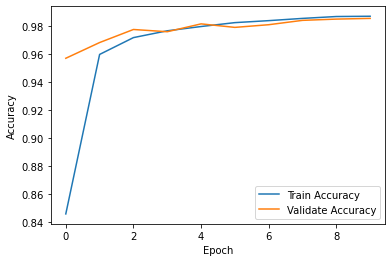

In [13]:
fig,ax=plt.subplots()
ax.plot(history.history['accuracy'], label='Train Accuracy')
ax.plot(history.history['val_accuracy'], label = 'Validate Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
plt.legend(loc='lower right')

In the above plot, we can see the training and validation accuracy is slightly higher than before. It can also be seen that at around 2 epochs, the training accuracy continues to increase but for validation accuracy it does not increase by the same amount. This suggests there may be overfitting from around 3 epochs onwards.

#### Training and Validation Loss

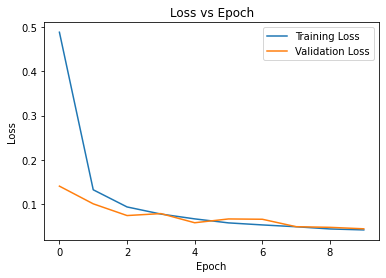

In [14]:
# Plot the training and validation loss
plt.figure()
plt.title('Loss vs Epoch')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The loss is shown above.

### Conclusion

Overall, after completing task 1 and 2, we can observe that adding further convolutional layers (and other layers) can improve our accuracy, however the improvement is not extremely significant (<0.01 increase), whilst the run-time and number of parameters increases by quite a lot (around 54,000 vs 93,000). Therefore we can conclude, for cases such as the one where we are recognising digits, it is probably not worth increasing the number of convolutional layers for such a small
improvement. 

Furthermore, we may also conclude that the effect of overfitting will prevent the model from reaching 100% accuracy, regardless of the number of layers used (or at least the layers I have tried in this notebook).


Perhaps if we had a more complex dataset, e.g. the fashion items dataset, it would be useful to have additional convolutional layers.